In [1]:
# Cell 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cell 2: Load preprocessed data from Step 1
X_train_scaled = np.load('../src/data/processed/X_train_scaled.npy')
X_test_scaled = np.load('../src/data/processed/X_test_scaled.npy')
y_train = np.load('../src/data/processed/y_train.npy')
y_test = np.load('../src/data/processed/y_test.npy')

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

Training data shape: (455, 30)
Test data shape: (114, 30)
Training labels distribution: [170 285]
Test labels distribution: [42 72]


In [3]:
# Cell 3: Initialize baseline models with optimal parameters based on literature[133][136]
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000,
        solver='lbfgs'
    ),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=5
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=10,
        min_samples_split=5
    )
}

print("Baseline Models Initialized:")
for name, model in models.items():
    print(f"- {name}: {model.__class__.__name__}")

Baseline Models Initialized:
- Logistic Regression: LogisticRegression
- Decision Tree: DecisionTreeClassifier
- Random Forest: RandomForestClassifier


In [4]:
# Cell 4: Define models and evaluation function with BOTH classes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Define the models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5)
}

print("✅ Models defined:")
for name in models.keys():
    print(f"   - {name}")

# Define enhanced evaluation function with BOTH Malignant and Benign metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Comprehensive model evaluation for baseline models.
    NOW INCLUDES BOTH MALIGNANT AND BENIGN CLASS METRICS.
    
    Parameters:
    -----------
    model : sklearn classifier
        Model to evaluate
    X_train, y_train : array-like
        Training data
    X_test, y_test : array-like
        Test data
    model_name : str
        Name of the model
    
    Returns:
    --------
    metrics : dict
        Dictionary containing all evaluation metrics (including both classes)
    y_pred : array
        Predicted labels
    y_pred_proba : array
        Predicted probabilities
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate comprehensive metrics
    metrics = {
        'Model': model_name,
        
        # Overall performance metrics
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1_Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
        
        # Malignant class metrics (pos_label=0) - Class 0
        'Precision_Class_0': precision_score(y_test, y_pred, pos_label=0),
        'Recall_Class_0': recall_score(y_test, y_pred, pos_label=0),
        'F1_Class_0': f1_score(y_test, y_pred, pos_label=0),
        
        # Also save as Malignant for consistency with other notebooks
        'Precision_Malignant': precision_score(y_test, y_pred, pos_label=0),
        'Recall_Malignant': recall_score(y_test, y_pred, pos_label=0),
        'F1_Malignant': f1_score(y_test, y_pred, pos_label=0),
        
        # Benign class metrics (pos_label=1) - Class 1 - NEW!
        'Precision_Class_1': precision_score(y_test, y_pred, pos_label=1),
        'Recall_Class_1': recall_score(y_test, y_pred, pos_label=1),
        'F1_Class_1': f1_score(y_test, y_pred, pos_label=1),
        
        # Also save as Benign for consistency with other notebooks
        'Precision_Benign': precision_score(y_test, y_pred, pos_label=1),
        'Recall_Benign': recall_score(y_test, y_pred, pos_label=1),
        'F1_Benign': f1_score(y_test, y_pred, pos_label=1),
    }
    
    # Print detailed results
    print(f"\n{'='*70}")
    print(f"Model: {model_name}")
    print(f"{'='*70}")
    print(f"Overall Performance:")
    print(f"  Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall:    {metrics['Recall']:.4f}")
    print(f"  F1-Score:  {metrics['F1_Score']:.4f}")
    print(f"  ROC-AUC:   {metrics['ROC_AUC']:.4f}")
    
    print(f"\nMalignant Class (0) - Cancer Detection:")
    print(f"  Precision: {metrics['Precision_Malignant']:.4f}")
    print(f"  Recall:    {metrics['Recall_Malignant']:.4f}")
    print(f"  F1-Score:  {metrics['F1_Malignant']:.4f}")
    
    print(f"\nBenign Class (1) - False Positive Control:")
    print(f"  Precision: {metrics['Precision_Benign']:.4f}")
    print(f"  Recall:    {metrics['Recall_Benign']:.4f}")
    print(f"  F1-Score:  {metrics['F1_Benign']:.4f}")
    
    return metrics, y_pred, y_pred_proba

print("\n✅ Enhanced evaluation function defined (includes both classes)")


✅ Models defined:
   - Logistic Regression
   - Decision Tree
   - Random Forest

✅ Enhanced evaluation function defined (includes both classes)


In [5]:
# Cell 5: Train and evaluate all baseline models
import os

results = []
predictions = {}
probabilities = {}

print("\n" + "="*80)
print("TRAINING BASELINE MODELS")
print("="*80)

for name, model in models.items():
    print(f"\n🔄 Training and evaluating {name}...")
    metrics, y_pred, y_pred_proba = evaluate_model(
        model, X_train_scaled, y_train, X_test_scaled, y_test, name
    )
    
    results.append(metrics)
    predictions[name] = y_pred
    probabilities[name] = y_pred_proba

# Create results DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("BASELINE MODELS COMPARISON - OVERALL METRICS")
print("="*80)
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']].to_string(index=False))

print("\n" + "="*80)
print("BASELINE MODELS COMPARISON - CLASS-SPECIFIC METRICS")
print("="*80)
print("\nMalignant Class Performance:")
print(results_df[['Model', 'Precision_Malignant', 'Recall_Malignant', 'F1_Malignant']].to_string(index=False))

print("\nBenign Class Performance:")
print(results_df[['Model', 'Precision_Benign', 'Recall_Benign', 'F1_Benign']].to_string(index=False))

# Save results with ALL metrics
os.makedirs('../results', exist_ok=True)
results_df.to_csv('../results/baseline_results.csv', index=False)

print("\n✅ Baseline results saved to: ../results/baseline_results.csv")
print(f"📊 Saved {len(results_df.columns)} metrics for {len(results_df)} models")



TRAINING BASELINE MODELS

🔄 Training and evaluating Logistic Regression...

Model: Logistic Regression
Overall Performance:
  Accuracy:  0.9825
  Precision: 0.9825
  Recall:    0.9825
  F1-Score:  0.9825
  ROC-AUC:   0.9954

Malignant Class (0) - Cancer Detection:
  Precision: 0.9762
  Recall:    0.9762
  F1-Score:  0.9762

Benign Class (1) - False Positive Control:
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861

🔄 Training and evaluating Decision Tree...

Model: Decision Tree
Overall Performance:
  Accuracy:  0.9035
  Precision: 0.9090
  Recall:    0.9035
  F1-Score:  0.9045
  ROC-AUC:   0.9216

Malignant Class (0) - Cancer Detection:
  Precision: 0.8298
  Recall:    0.9286
  F1-Score:  0.8764

Benign Class (1) - False Positive Control:
  Precision: 0.9552
  Recall:    0.8889
  F1-Score:  0.9209

🔄 Training and evaluating Random Forest...

Model: Random Forest
Overall Performance:
  Accuracy:  0.9474
  Precision: 0.9474
  Recall:    0.9474
  F1-Score:  0.9474
  ROC-AUC: 

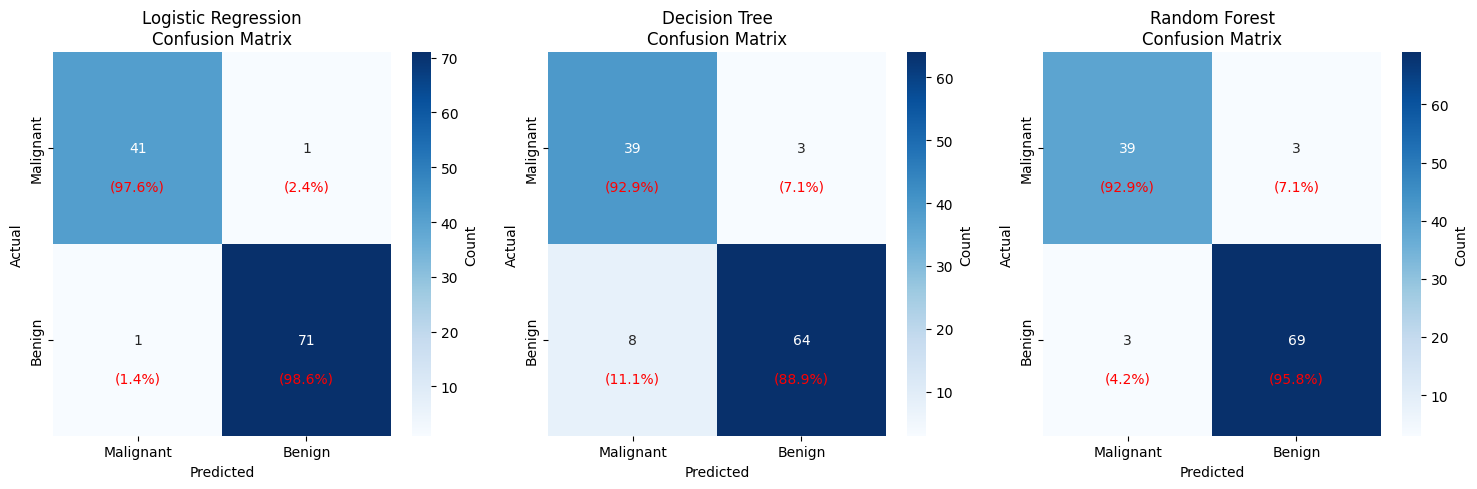

In [6]:
# Cell 6: Generate and visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
class_names = ['Malignant', 'Benign']

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], 
                xticklabels=class_names, yticklabels=class_names,
                cmap='Blues', cbar_kws={'label': 'Count'})
    
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    
    # Add percentage annotations
    for j in range(2):
        for k in range(2):
            axes[i].text(k+0.5, j+0.7, f'({cm_normalized[j,k]:.1f}%)', 
                        ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

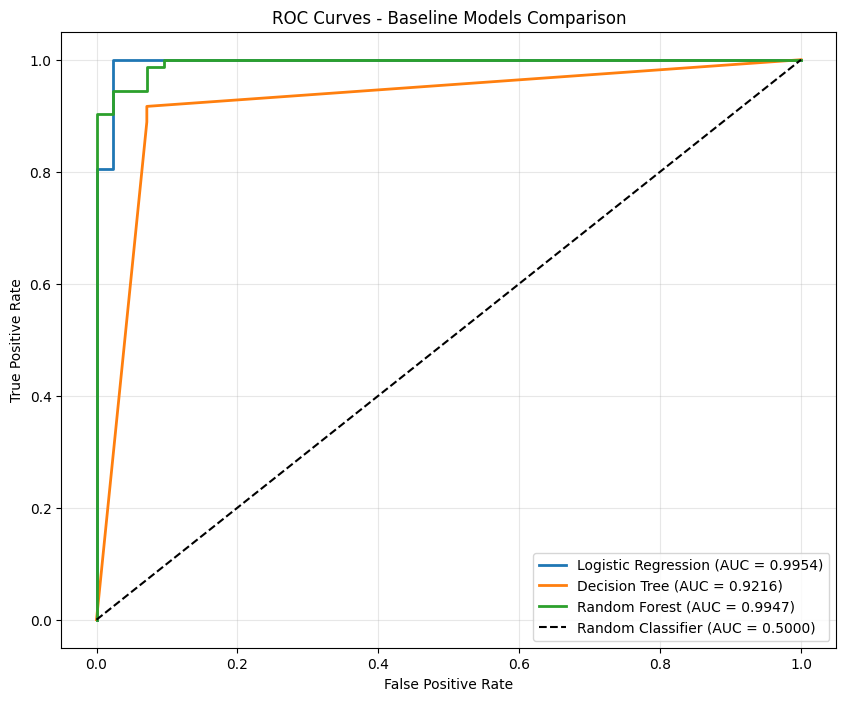

In [7]:
plt.figure(figsize=(10, 8))

for name, y_pred_proba in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Baseline Models Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../reports/figures/baseline_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

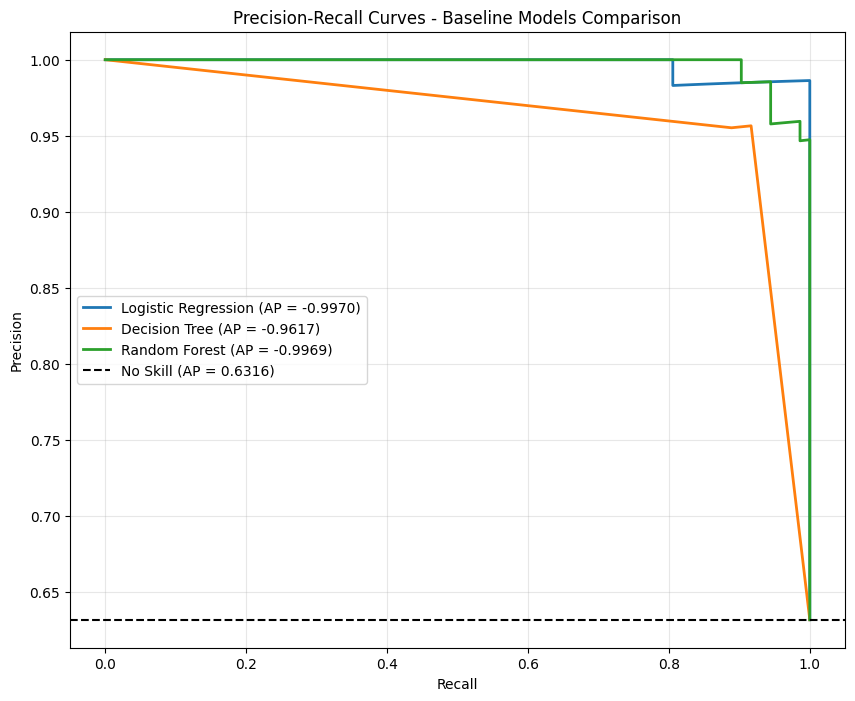

In [8]:
# Cell 8: Precision-Recall curves (critical for imbalanced data[61][67])
plt.figure(figsize=(10, 8))

for name, y_pred_proba in probabilities.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = np.trapz(precision, recall)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.4f})', linewidth=2)

# Baseline (no-skill classifier)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.axhline(y=no_skill, color='k', linestyle='--', 
           label=f'No Skill (AP = {no_skill:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Baseline Models Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../reports/figures/baseline_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Cell 9: Analyze the accuracy paradox and class imbalance impact[137][141]
print("="*80)
print("ACCURACY PARADOX ANALYSIS")
print("="*80)

# Calculate majority class baseline (ZeroR classifier[141])
majority_class = np.bincount(y_test).argmax()
majority_baseline = np.max(np.bincount(y_test)) / len(y_test)

print(f"Dataset Characteristics:")
print(f"  Total test samples: {len(y_test)}")
print(f"  Malignant (0): {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Benign (1): {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)")
print(f"  Majority class: {majority_class} ({'Benign' if majority_class == 1 else 'Malignant'})")
print(f"  ZeroR Baseline Accuracy: {majority_baseline:.4f}")

print(f"\nModel Performance vs Baseline:")
for _, row in results_df.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    improvement = accuracy - majority_baseline
    print(f"  {model_name}: {accuracy:.4f} (Δ = +{improvement:.4f})")

# Highlight the importance of minority class metrics
print(f"\nMINORITY CLASS (MALIGNANT) PERFORMANCE:")
print("="*50)
for _, row in results_df.iterrows():
    print(f"{row['Model']}:")
    print(f"  Precision: {row['Precision_Class_0']:.4f}")
    print(f"  Recall: {row['Recall_Class_0']:.4f}")
    print(f"  F1-Score: {row['F1_Class_0']:.4f}")

ACCURACY PARADOX ANALYSIS
Dataset Characteristics:
  Total test samples: 114
  Malignant (0): 42 (36.8%)
  Benign (1): 72 (63.2%)
  Majority class: 1 (Benign)
  ZeroR Baseline Accuracy: 0.6316

Model Performance vs Baseline:
  Logistic Regression: 0.9825 (Δ = +0.3509)
  Decision Tree: 0.9035 (Δ = +0.2719)
  Random Forest: 0.9474 (Δ = +0.3158)

MINORITY CLASS (MALIGNANT) PERFORMANCE:
Logistic Regression:
  Precision: 0.9762
  Recall: 0.9762
  F1-Score: 0.9762
Decision Tree:
  Precision: 0.8298
  Recall: 0.9286
  F1-Score: 0.8764
Random Forest:
  Precision: 0.9286
  Recall: 0.9286
  F1-Score: 0.9286


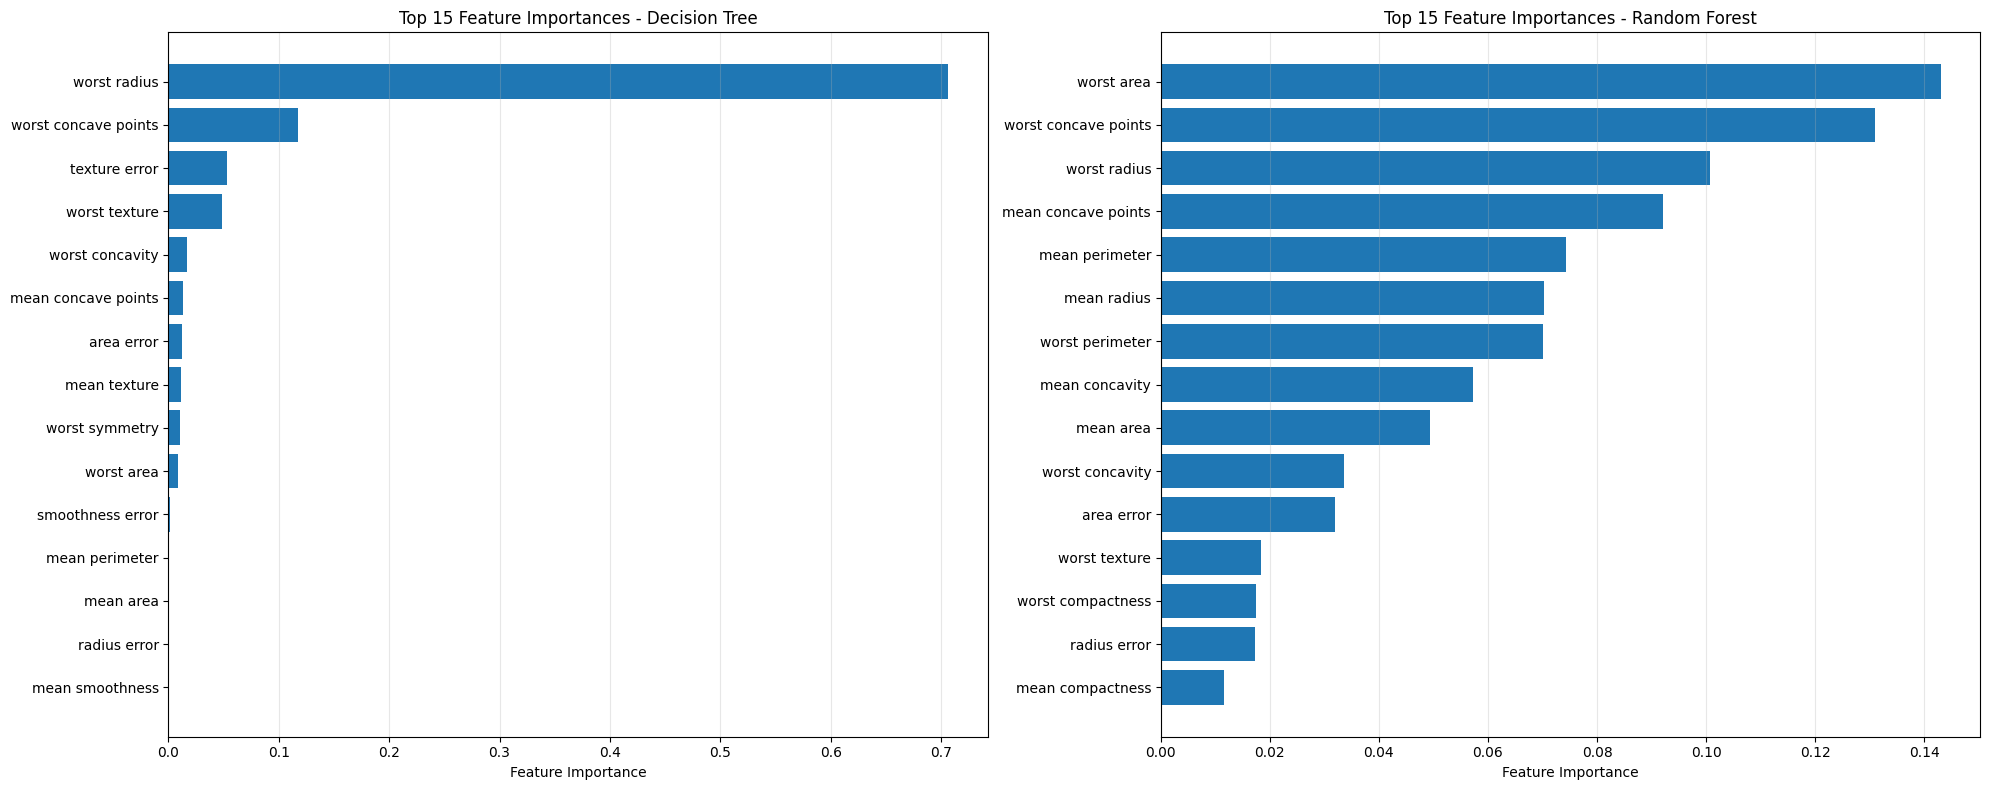

In [10]:
# Cell 10: Feature importance analysis
from sklearn.datasets import load_breast_cancer

# Load original feature names
data = load_breast_cancer()
feature_names = data.feature_names

# Get feature importance for tree-based models
tree_models = ['Decision Tree', 'Random Forest']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, name in enumerate(tree_models):
    model = models[name]
    # Re-fit to ensure we have the trained model
    model.fit(X_train_scaled, y_train)
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:15]  # Top 15 features
    
    axes[i].barh(range(15), importances[indices][::-1])
    axes[i].set_yticks(range(15))
    axes[i].set_yticklabels([feature_names[j] for j in indices[::-1]])
    axes[i].set_xlabel('Feature Importance')
    axes[i].set_title(f'Top 15 Feature Importances - {name}')
    axes[i].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/baseline_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Cell 11: Cross-validation for robust performance estimation
from sklearn.model_selection import cross_val_score, StratifiedKFold

print("="*80)
print("CROSS-VALIDATION ANALYSIS")
print("="*80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    print(f"\nCross-validating {name}...")
    
    # Multiple metrics
    accuracy_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_weighted')
    precision_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='precision_weighted')
    recall_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='recall_weighted')
    
    cv_results[name] = {
        'Accuracy': accuracy_scores,
        'F1_Score': f1_scores,
        'Precision': precision_scores,
        'Recall': recall_scores
    }
    
    print(f"  Accuracy: {accuracy_scores.mean():.4f} (±{accuracy_scores.std()*2:.4f})")
    print(f"  F1-Score: {f1_scores.mean():.4f} (±{f1_scores.std()*2:.4f})")
    print(f"  Precision: {precision_scores.mean():.4f} (±{precision_scores.std()*2:.4f})")
    print(f"  Recall: {recall_scores.mean():.4f} (±{recall_scores.std()*2:.4f})")

CROSS-VALIDATION ANALYSIS

Cross-validating Logistic Regression...
  Accuracy: 0.9780 (±0.0197)
  F1-Score: 0.9780 (±0.0198)
  Precision: 0.9785 (±0.0190)
  Recall: 0.9780 (±0.0197)

Cross-validating Decision Tree...
  Accuracy: 0.9187 (±0.0264)
  F1-Score: 0.9192 (±0.0262)
  Precision: 0.9226 (±0.0249)
  Recall: 0.9187 (±0.0264)

Cross-validating Random Forest...
  Accuracy: 0.9582 (±0.0323)
  F1-Score: 0.9582 (±0.0321)
  Precision: 0.9590 (±0.0318)
  Recall: 0.9582 (±0.0323)


In [12]:
# Cell 12: Save results and trained models
import joblib

# Save results to CSV
results_df.to_csv('../results/baseline_results.csv', index=False)
print("Results saved to ../results/baseline_results.csv")

# Save trained models
os.makedirs('../models/baseline', exist_ok=True)
for name, model in models.items():
    model_filename = name.lower().replace(' ', '_') + '.joblib'
    model_path = f'../models/baseline/{model_filename}'
    joblib.dump(model, model_path)
    print(f"Saved {name} model to {model_path}")

print("\nStep 2 completed successfully!")
print("Generated files:")
print("- ../reports/figures/baseline_confusion_matrices.png")
print("- ../reports/figures/baseline_roc_curves.png") 
print("- ../reports/figures/baseline_pr_curves.png")
print("- ../reports/figures/baseline_feature_importance.png")
print("- ../results/baseline_results.csv")
print("- ../models/baseline/logistic_regression.joblib")
print("- ../models/baseline/decision_tree.joblib")
print("- ../models/baseline/random_forest.joblib")

Results saved to ../results/baseline_results.csv
Saved Logistic Regression model to ../models/baseline/logistic_regression.joblib
Saved Decision Tree model to ../models/baseline/decision_tree.joblib
Saved Random Forest model to ../models/baseline/random_forest.joblib

Step 2 completed successfully!
Generated files:
- ../reports/figures/baseline_confusion_matrices.png
- ../reports/figures/baseline_roc_curves.png
- ../reports/figures/baseline_pr_curves.png
- ../reports/figures/baseline_feature_importance.png
- ../results/baseline_results.csv
- ../models/baseline/logistic_regression.joblib
- ../models/baseline/decision_tree.joblib
- ../models/baseline/random_forest.joblib
